Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:
  - performer: who performed the song
  - song: the title of the song
  - year: year (1958 to 2021)
  - week: chart week of that year (1, 2, etc)
  - week_position: what position that song occupied that week on the Billboard 
    top 100 chart.
    
Use your skills in data wrangling and plotting to answer the following three questions.

Part A: Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("billboard.csv")
df[:5]

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33


In [15]:
# Groups the dataframe by both the performer and song columns.
# The count of weeks spent on the chart is then determined for each song.
df_with_count = df.groupby(['performer', 'song']).size().reset_index(name='count')

# The values are then sorted in descending order of the count variable, in order to obtain the top 10 most popular songs since 1958.
top_10_most_pop_songs = df_with_count.sort_values(by='count', ascending=False).head(10)
print("Top 10 Most Popular Songs on Billboard Since 1958, measured by the total number of weeks spent on the chart.")
top_10_most_pop_songs

Top 10 Most Popular Songs on Billboard Since 1958, measured by the total number of weeks spent on the chart.


,performer,song,count
11194,Imagine Dragons,Radioactive,87
403,AWOLNATION,Sail,79
27121,The Weeknd,Blinding Lights,76
12026,Jason Mraz,I'm Yours,76
15008,LeAnn Rimes,How Do I Live,69
18752,OneRepublic,Counting Stars,68
14807,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
12421,Jewel,Foolish Games/You Were Meant For Me,65
506,Adele,Rolling In The Deep,65
4347,Carrie Underwood,Before He Cheats,64


From the table above, we can observe that the most popular song on the Billboard Top 100 is "Radioactive" by Imagine Dragons, spending 87 total weeks on the chart. This is followed by "Sail" by "AWOLNATION", "Blinding Lights" by The Weeknd, and "I'm Yours" by Jason Mraz, all which spent between 76 and 79 weeks on the chart. The fifth to seventh-most popular songs ended up being "How Do I Live" by LeAnn Rimes, "Counting Stars" by OneRepublic, and "Party Rock Anthem" by LMFAO (Ft. Lauren Bennett & GoonRock). The eighth to tenth-most popular songs are "Foolish Games/You Were Meant For Me" by Jewel, "Rolling in the Deep" by Adele, and "Before He Cheats" by Carrie Underwood, with weeks spent on the chart of 65, 65, and 64, respectively.

Part B: Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

Musical diversity on the Billboard Top 100 chart from 1959 to 2020, based on the number of unique songs present on the chart for each year.


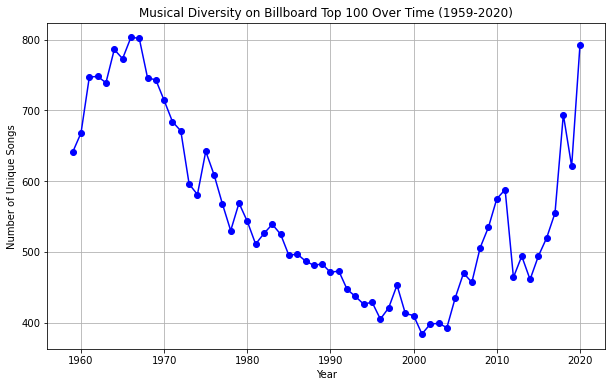

In [20]:
import matplotlib.pyplot as plt

# Excludes the years 1958 and 2021 from the data frame.
cleaned_df = df[(df['year'] > 1958) & (df['year'] < 2021)]

# Determines the number of unique songs per year
unique_songs_per_year = cleaned_df.groupby('year')['song'].nunique().reset_index(name='unique_songs')

# Creates a line graph for the data.
plt.figure(figsize=(10, 6))
plt.plot(unique_songs_per_year['year'], unique_songs_per_year['unique_songs'], marker='o', linestyle='-', color='b')
plt.title("Musical Diversity on Billboard Top 100 Over Time (1959-2020)")
plt.xlabel("Year")
plt.ylabel("Number of Unique Songs")
plt.grid(True)

print("Musical diversity on the Billboard Top 100 chart from 1959 to 2020, based on the number of unique songs present on the chart for each year.")

plt.show()

The line graph above illustrates the number of unique songs present on the Billboard Top 100 chart for every year from 1959 to 2020. Because 1958 and 2021 did not possess complete data, they are not shown in the above graph. From examining the line graph above, interesting patterns emerge. First off, it appears that the musical diversity on the chart peaked somewhere between 1966 and 1967, with over 800 unique songs present on the chart during that time period. From that point, although there are some spikes upward, musical diversity gradually declined all the way until about 2001, where less than 400 unique songs appeared on the chart. This trend reverse for the next 10 years, up until 2011, with a relative peak of close to 600 unique songs present. There was then a sharp drop in diversity from 2012-2015, as the number of unique songs hovered around 500 per year. Since then, though, musical diversity has dramatically increased, going from sub-500 songs present to nearly 800 unique songs appearing on the chart for 2020. Now, it seems that the musical diversity of the chart is nearly as diverse as it was back in the mid-1960s.

Part C: Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

Notes:

- You might find this easier to accomplish in two distinct sets of data wrangling steps.
- Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.
- By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the fct_reorder function, described in this blog post. This is optional.

Presents the 19 artists in U.S. musical history since 1958 who have possessed at least 30 songs that were ten-week hits.


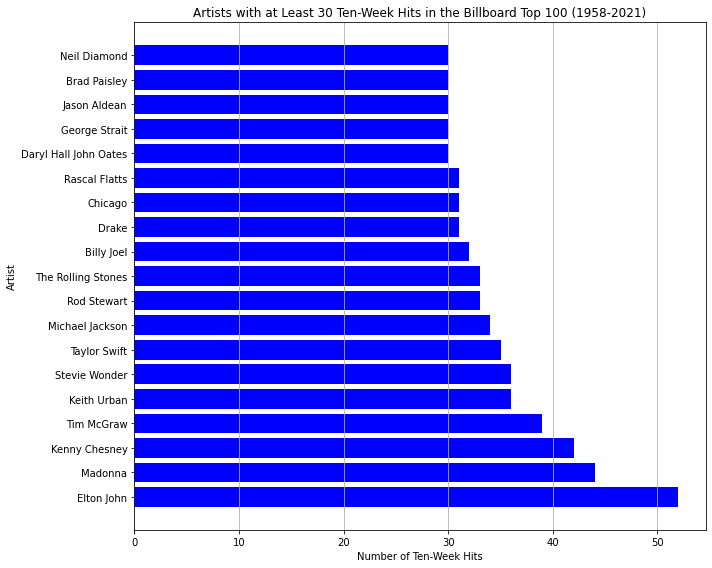

In [23]:
# Filtering based on songs that are deemed to be ten-week hits
ten_wk_hits_df = df.groupby(['performer', 'song']).filter(lambda x: x['week_position'].count() >= 10)

# Determining the number of songs which were ten-week hits based on the artist
ten_wk_hits_per_artist = ten_wk_hits_df.groupby('performer')['song'].nunique().reset_index(name='ten_week_hits')

# Filters the data based on artists possessing at least 30 ten-week hits
hitmakers = ten_wk_hits_per_artist[ten_wk_hits_per_artist['ten_week_hits'] >= 30]

# Sorts the values of the data based on the number of ten-week hits
hitmakers = hitmakers.sort_values(by='ten_week_hits', ascending=False)

# Creates a bar plot for the data
plt.figure(figsize=(10, 8))
plt.barh(hitmakers['performer'], hitmakers['ten_week_hits'], color='blue')
plt.xlabel("Number of Ten-Week Hits")
plt.ylabel("Artist")
plt.title("Artists with at Least 30 Ten-Week Hits in the Billboard Top 100 (1958-2021)")
plt.grid(True, axis='x')

print("Presents the 19 artists in U.S. musical history since 1958 who have possessed at least 30 songs that were ten-week hits.")

plt.tight_layout()
plt.show()

The bar plot above shows the 19 artists in U.S. musical history since 1958 which have had at least 30 songs which were deemed ten-week hits. For this purpose, a ten-week hit is defined as a single song that appeared on the Billboard Top 100 for a period of at least 10 weeks. The x-axis displays the number of ten-weeks hits per artist, and the y-axis presents the corresponding artist for each number of ten-week hits. The artist with the greatest number of ten-week hits is Elton John, with over 50 songs falling into this category. Rounding out the top five are artists like Madonna and Kenny Chesney, with over 40 ten-week hits, and artists like Tim McGraw and Keith Urban, which have between 35 and 40 such songs. Other artists in the bar plot with over 30 ten-week hits are Stevie Wonder, Taylor Swift, Michael Jackson, Rod Stewart, The Rolling Stones, Billy Joel, Drake, Chicago, and Rascal Flatts. Intriguingly, five artists have exactly 30 ten-week hits on the Billboard Top 100: Neil Diamond, Brad Paisley, Jason Aldean, George Strait, and Daryl Hall John Oates. Overall, it seems that Pop, Country, and Rock artists possess the most individual songs which stay on the chart for at least ten weeks.